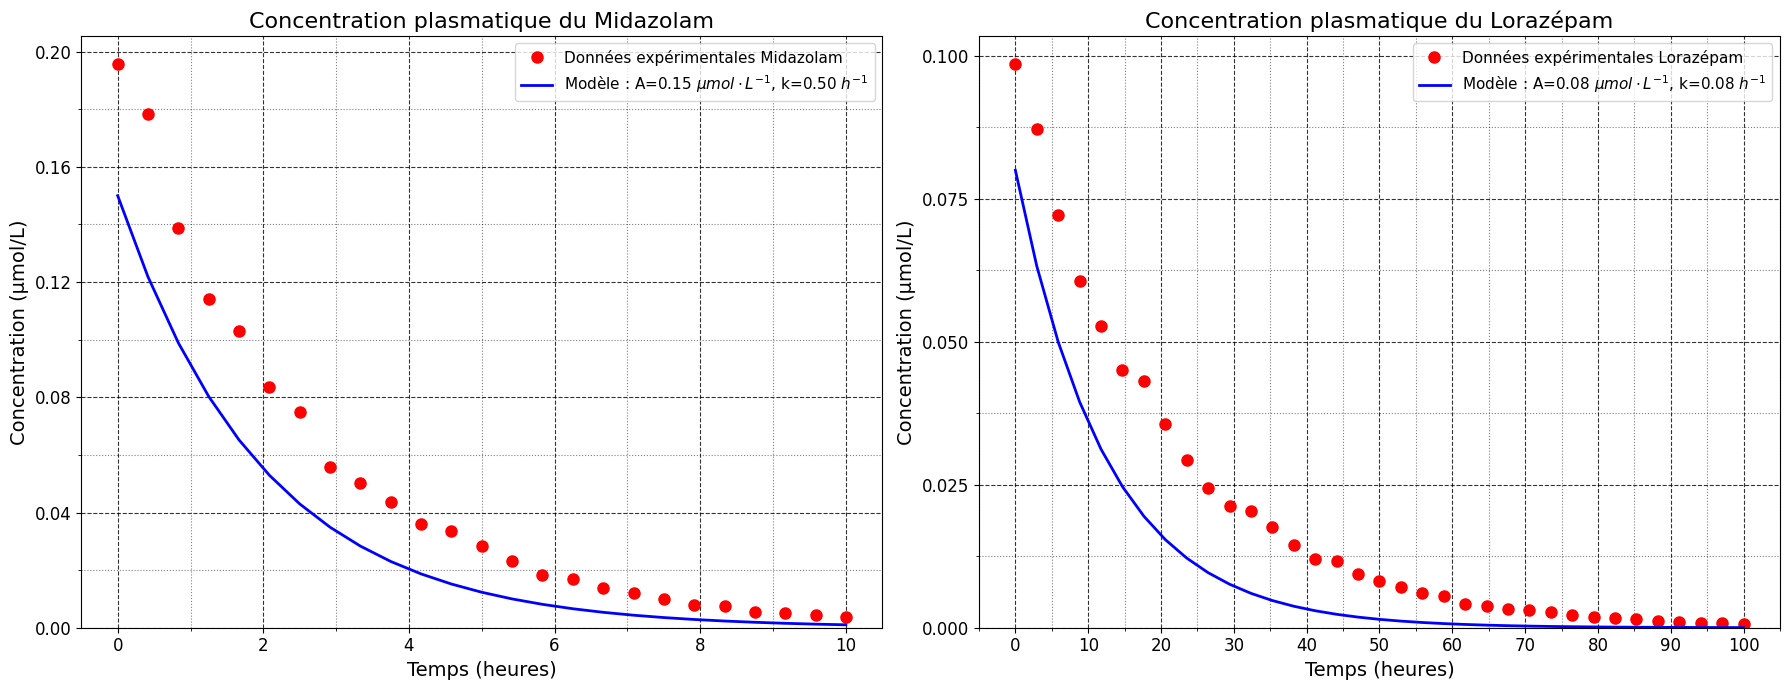

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# =============================================================================
# VEUILLEZ MODIFIER LES VALEURS DE A ET k CI-DESSOUS POUR AJUSTER LES COURBES !
# L'objectif est que la ligne bleue colle au mieux aux points rouges "expérimentaux".
# =============================================================================

# --- Paramètres à ajuster pour le Midazolam ---
A_midazolam = 0.15 # unité micromol/L
k_midazolam = 0.5  # unité h-1

# --- Paramètres à ajuster pour le Lorazépam ---
A_lorazepam = 0.08 # unité micromol/L
k_lorazepam = 0.08 # unité h-1

# =============================================================================
# NE MODIFIEZ RIEN SOUS CETTE LIGNE, SAUF INDICATION !
# =============================================================================

# --- Fonction modèle pour la cinétique d'ordre 1 (que l'élève va manipuler) ---
def modele_ordre_1(temps, A, k):
    """
    Modèle de concentration pour une cinétique d'ordre 1 : [R] = A * exp(-kt)

    Args:
        temps (numpy.array): Tableau des temps.
        A (float): Concentration initiale.
        k (float): Constante de vitesse.

    Returns:
        numpy.array: Concentrations prédites par le modèle.
    """
    return A * np.exp(-k * temps)

# --- Chargement des données "expérimentales" ---
try:
    data_midazolam = np.load('donnees_midazolam.npz')
    temps_midazolam = data_midazolam['temps']
    conc_midazolam_exp = data_midazolam['concentration']

    data_lorazepam = np.load('donnees_lorazepam.npz')
    temps_lorazepam = data_lorazepam['temps']
    conc_lorazepam_exp = data_lorazepam['concentration']
except FileNotFoundError:
    print("Erreur : Les fichiers de données (donnees_midazolam.npz ou donnees_lorazepam.npz) sont introuvables.")
    print("Assurez-vous d'avoir exécuté le script 'generateur_donnees_pharma.py' au préalable.")
    exit()



# Génération des courbes modèles avec les paramètres choisis par l'élève
conc_midazolam_modele = modele_ordre_1(temps_midazolam, A_midazolam, k_midazolam)
conc_lorazepam_modele = modele_ordre_1(temps_lorazepam, A_lorazepam, k_lorazepam)

# --- Création de la figure avec deux sous-graphes ---
fig, axes = plt.subplots(1, 2, figsize=(18, 7)) # 1 ligne, 2 colonnes

# --- Graphe pour le Midazolam ---
ax1 = axes[0]
ax1.plot(
    temps_midazolam, conc_midazolam_exp,
    marker='o',
    linestyle='None',
    color="red",
    markeredgewidth=1,
    markersize=8,
    label="Données expérimentales Midazolam"
)
ax1.plot(
    temps_midazolam, conc_midazolam_modele,
    linestyle='-',
    color="blue",
    linewidth=2,
    label=f"Modèle : A={A_midazolam:.2f} $\\mu mol\cdot L^{{-1}}$, k={k_midazolam:.2f} $h^{{-1}}$" 
)

ax1.set_title("Concentration plasmatique du Midazolam", fontsize=16)
ax1.set_xlabel("Temps (heures)", fontsize=14)
ax1.set_ylabel("Concentration (µmol/L)", fontsize=14)
ax1.grid(True, which='major', linestyle='--', color='#000000', alpha=0.8)
ax1.grid(True, which='minor', linestyle=':', color='#000000', alpha=0.5)
ax1.tick_params(axis='y', labelsize=12)
ax1.tick_params(axis='x', labelsize=12)
ax1.legend(fontsize=11)

# Ajuster les tics pour le graphique du Midazolam (basé sur les données expérimentales chargées)
# Pour que les tics soient cohérents, on peut les ajuster sur la base de la valeur max observée
y_max_midazolam = np.max(conc_midazolam_exp) * 1.1 # Un peu au-dessus du max pour la visibilité
ax1.yaxis.set_major_locator(ticker.MultipleLocator(round(y_max_midazolam / 5, 2)))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(round(y_max_midazolam / 10, 2)))
ax1.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(1))
ax1.set_ylim(bottom=0) # S'assurer que l'axe y commence à 0

# --- Graphe pour le Lorazépam ---
ax2 = axes[1]
ax2.plot(
    temps_lorazepam, conc_lorazepam_exp,
    marker='o',
    linestyle='None',
    color="red",
    markeredgewidth=1,
    markersize=8,
    label="Données expérimentales Lorazépam"
)
ax2.plot(
    temps_lorazepam, conc_lorazepam_modele,
    linestyle='-',
    color="blue",
    linewidth=2,
    label=f"Modèle : A={A_lorazepam:.2f} $\\mu mol\cdot L^{{-1}}$, k={k_lorazepam:.2f} $h^{{-1}}$"
)

ax2.set_title("Concentration plasmatique du Lorazépam", fontsize=16)
ax2.set_xlabel("Temps (heures)", fontsize=14)
ax2.set_ylabel("Concentration (µmol/L)", fontsize=14)
ax2.grid(True, which='major', linestyle='--', color='#000000', alpha=0.8)
ax2.grid(True, which='minor', linestyle=':', color='#000000', alpha=0.5)
ax2.tick_params(axis='y', labelsize=12)
ax2.tick_params(axis='x', labelsize=12)
ax2.legend(fontsize=11)

# Ajuster les tics pour le graphique du Lorazépam
y_max_lorazepam = np.max(conc_lorazepam_exp) * 1.1
ax2.yaxis.set_major_locator(ticker.MultipleLocator(0.025))
ax2.yaxis.set_minor_locator(ticker.MultipleLocator(0.025/2))
ax2.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax2.xaxis.set_minor_locator(ticker.MultipleLocator(5))
ax2.set_ylim(bottom=0) # S'assurer que l'axe y commence à 0

plt.tight_layout() # Ajuste automatiquement les paramètres des sous-graphes pour qu'ils s'adaptent à la figure
plt.show()